In [18]:
from PIL import Image

In [19]:
import numpy as np

In [20]:
import glob

In [498]:
# I get data_list with
fire_data_list = glob.glob('../datasets/fire/fire/*.jpg')

In [499]:
fire_data=[np.array(Image.open(v).resize((495,426))) for v in fire_data_list]

In [500]:
traffic_data_list = glob.glob('../datasets/traffic_incident/traffic_incident/*.jpg')

In [501]:
traffic_data=[np.array(Image.open(v).resize((495,426))) for v in traffic_data_list]

In [502]:
injury_data_list = glob.glob('../datasets/injury/injury/*.jpg')

In [503]:
injury_data=[np.array(Image.open(v).resize((495,426))) for v in injury_data_list]

In [504]:
normal_data_list = glob.glob('../datasets/normal/normal/*.jpg')

In [505]:
normal_data=[np.array(Image.open(v).resize((495,426))) for v in normal_data_list]

In [506]:
fire_labels=[0]*len(fire_data_list)

In [507]:
traffic_labels=[1]*len(traffic_data_list)

In [508]:
injury_labels=[2]*len(injury_data_list)

In [509]:
normal_labels=[3]*len(normal_data_list)

In [510]:
total_data=fire_data+traffic_data+injury_data+normal_data

In [511]:
total_labels=fire_labels+traffic_labels+injury_labels+normal_labels

In [512]:
import random

In [513]:
combined=list(zip(total_data,total_labels))

In [514]:
random.shuffle(combined)

In [515]:
total_data,total_labels=zip(*combined)

In [516]:
total_labels=np.array(total_labels)

In [517]:
total_data=np.array(total_data)

In [518]:
len(total_data)==len(total_labels)

True

In [519]:
total_data.shape

(2955, 426, 495, 3)

In [862]:
print(list(total_labels[:200]))

[3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 2, 1, 3, 1, 1, 2, 1, 2, 3, 0, 1, 0, 2, 1, 2, 3, 2, 0, 1, 0, 1, 0, 3, 3, 0, 0, 3, 2, 3, 1, 1, 1, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 1, 0, 3, 3, 0, 3, 0, 0, 2, 0, 1, 3, 1, 1, 0, 0, 1, 1, 3, 0, 0, 2, 3, 1, 0, 1, 3, 2, 0, 0, 3, 1, 3, 1, 1, 3, 0, 2, 1, 3, 1, 1, 2, 3, 0, 3, 3, 3, 3, 2, 0, 2, 0, 0, 1, 2, 1, 0, 2, 3, 0, 0, 2, 3, 3, 0, 3, 1, 0, 3, 3, 2, 2, 3, 3, 0, 0, 3, 1, 3, 0, 1, 3, 1, 3, 3, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 3, 1, 0, 2, 3, 1, 3, 3, 3, 3, 0, 0, 3, 3, 1, 2, 2, 0, 0, 3, 2, 3, 2, 0, 3, 1, 1, 0, 3, 1, 1, 3, 0, 3, 2, 2, 0, 1, 3, 0, 3, 1, 1, 3]


In [521]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np

In [522]:
from tensorflow.keras import layers

In [523]:
from keras.models import Sequential

In [524]:
from keras.layers import Dropout

In [525]:
'''
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(495, 426,3)),
    tf.keras.layers.Dense(2100, activation='relu'),
    tf.keras.layers.Dense(2)
])
'''
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(426, 495, 3)),
  layers.Conv2D(32, 5, padding='same', activation='relu'),
  layers.MaxPooling2D((3,3)),
  layers.Conv2D(64, 5, padding='same', activation='relu'),
  layers.MaxPooling2D((3,3)),
  layers.Conv2D(128, 5, padding='same', activation='relu'),
  layers.MaxPooling2D((3,3)),
  layers.Conv2D(256, 5, padding='same', activation='relu'),
  layers.MaxPooling2D((3,3)),
  layers.Conv2D(512, 5, padding='same', activation='relu'),
  layers.MaxPooling2D((3,3)),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(1024, activation='relu'),
  layers.Dense(4)
])

In [526]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [527]:
model.fit(total_data, total_labels, epochs=10,validation_split=0.1)

Epoch 1/10
84/84 [==============================] - 580s 7s/step - loss: 1.2653 - accuracy: 0.3994 - val_loss: 1.0864 - val_accuracy: 0.5743
Epoch 2/10
84/84 [==============================] - 567s 7s/step - loss: 1.1312 - accuracy: 0.5002 - val_loss: 0.9508 - val_accuracy: 0.5946
Epoch 3/10
84/84 [==============================] - 573s 7s/step - loss: 0.9176 - accuracy: 0.6175 - val_loss: 0.8155 - val_accuracy: 0.6419
Epoch 4/10
84/84 [==============================] - 584s 7s/step - loss: 0.7923 - accuracy: 0.6826 - val_loss: 0.6979 - val_accuracy: 0.7264
Epoch 5/10
84/84 [==============================] - 593s 7s/step - loss: 0.7262 - accuracy: 0.7048 - val_loss: 0.8051 - val_accuracy: 0.7196
Epoch 6/10
84/84 [==============================] - 606s 7s/step - loss: 0.6022 - accuracy: 0.7740 - val_loss: 0.5552 - val_accuracy: 0.8041
Epoch 7/10
84/84 [==============================] - 595s 7s/step - loss: 0.4848 - accuracy: 0.8251 - val_loss: 0.5245 - val_accuracy: 0.8074
Epoch 8/10
84

In [851]:
sampletest = glob.glob('../datasets/sampletest/injured11.jpg')

In [852]:
import matplotlib.pyplot as plt

In [853]:
import cv2

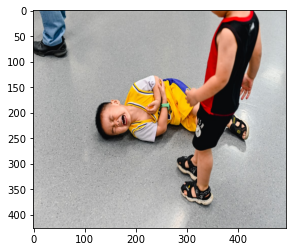

In [854]:
im = cv2.imread('../datasets/sampletest/injured11.jpg')
im_resized = cv2.resize(im, (495, 426), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [855]:
sampletest=[np.array(Image.open(v).resize((495,426))) for v in sampletest]

In [856]:
sampletest=np.array(sampletest)

In [873]:
predictions=model3.predict(sampletest)

In [874]:
score = tf.nn.softmax(predictions[0])

In [875]:
score

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.11642371, 0.00164818, 0.88050795, 0.00142013], dtype=float32)>

In [876]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(['Fire','Traffic','Injury','Normal'][np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Injury with a 88.05 percent confidence.


In [848]:
import tensorflow as tf

In [756]:
from keras.models import load_model

In [630]:
model.save('JordanModel1')

INFO:tensorflow:Assets written to: JordanModel1\assets


In [871]:
model3 = load_model('JordanModel1')

In [872]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 426, 495, 3)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 426, 495, 32)      2432      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 142, 165, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 142, 165, 64)      51264     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 47, 55, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 47, 55, 128)       204928    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 18, 128)      

In [116]:
total_data.shape

(1006, 426, 495, 3)

In [112]:
len(total_labels)

1006

In [113]:
total_data.shape

AttributeError: 'list' object has no attribute 'shape'

In [40]:
data[0][0][0]

array([60, 70, 61], dtype=uint8)

In [50]:
sum(Image.open(f, 'r').size for f in data_list)/len(data_list)

TypeError: unsupported operand type(s) for +: 'int' and 'tuple'

In [43]:
from numpy import array
image_array = array([Image.open(f, 'r').size for f in data_list])
print(image_array.argmax())

42


In [46]:
def get_img_size(path):
    width, height = Image.open(path).size
    return width*height

largest = max(data_list, key=get_img_size)

In [47]:
largest

'../datasets/fire/fire\\fire_image0022.jpg'